In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
pwd

'/content'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warnings'

In [0]:
prior = pd.read_csv("../gdrive/My Drive/Market_Basket/order_products__prior.csv")
orders = pd.read_csv("../gdrive/My Drive/Market_Basket/orders.csv")
products = pd.read_csv("../gdrive/My Drive/Market_Basket/products.csv")
aisles = pd.read_csv("../gdrive/My Drive/Market_Basket/aisles.csv")
departments = pd.read_csv("../gdrive/My Drive/Market_Basket/departments.csv")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


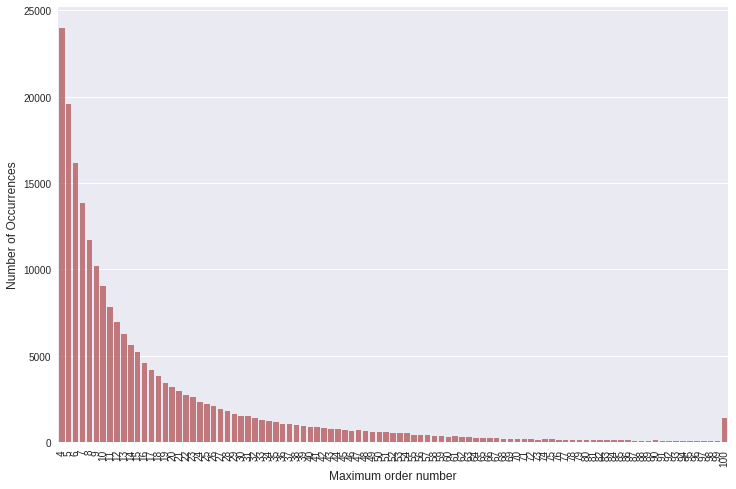

In [0]:
cnt_ord = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_ord = cnt_ord.order_number.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_ord.index, cnt_ord.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

So there are no orders less than 4 and is max capped at 100. 

Now let us see how the ordering habit changes with day of week.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


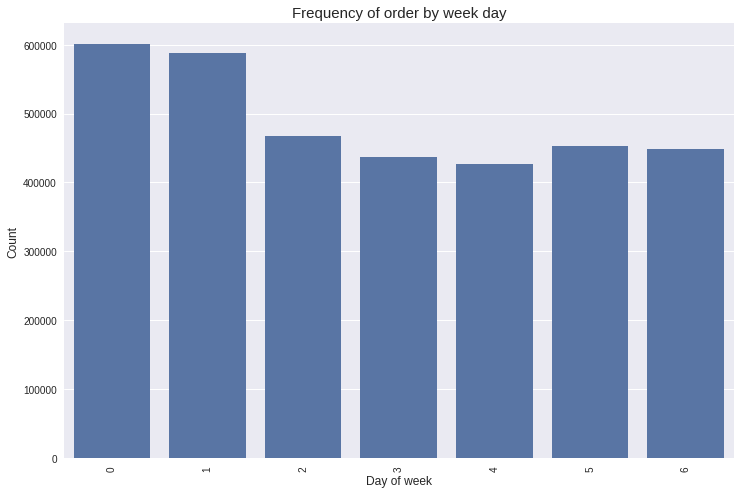

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

Seems like 0 and 1 are Saturday and Sunday when the orders are high and low during Wednesday.

Now we will see how the distribution is with respect to time of the day.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


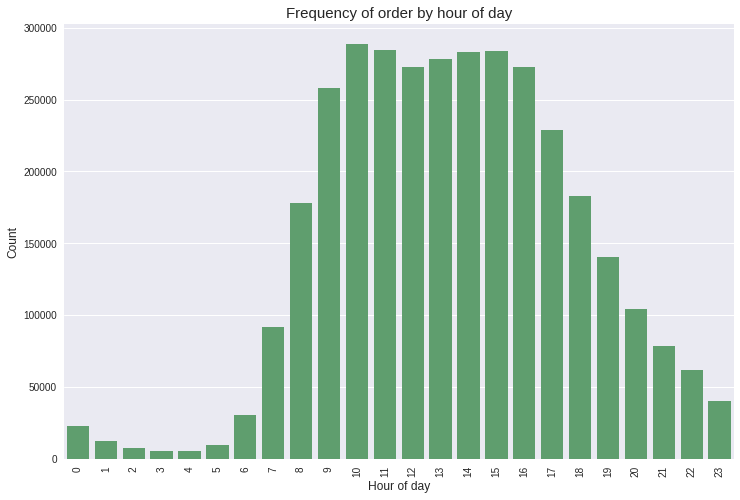

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

So majority of the orders are made during day time. 

Now let us combine the day of week and hour of day to see the distribution.

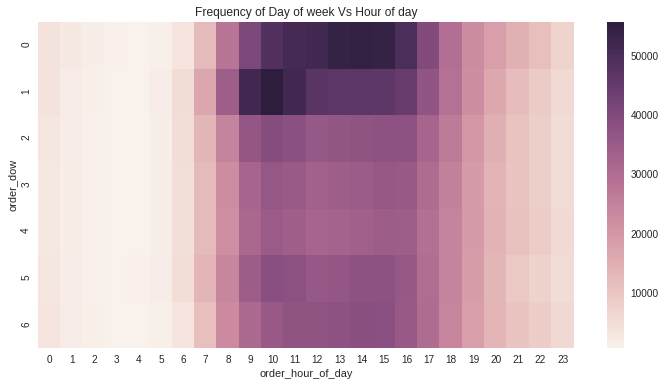

In [0]:
grouped = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped = grouped.pivot('order_dow', 'order_hour_of_day', 'order_number')
plt.figure(figsize=(12,6))
sns.heatmap(grouped)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Seems Satuday evenings and Sunday mornings are the prime time for orders.

Now let us check the time interval between the orders.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


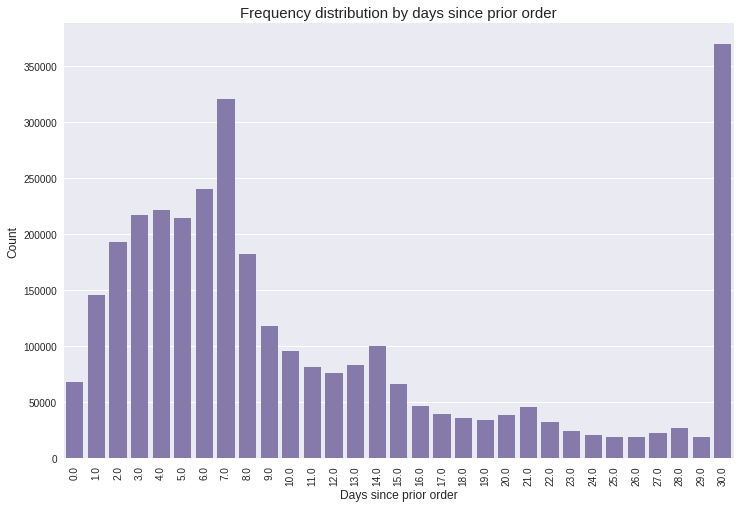

In [0]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

Now let us merge products,department,aisles with prior

In [0]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
order_merged = orders.merge(prior, left_on="order_id", right_on="order_id", how="outer")
order_merged = order_merged.dropna(subset=["user_id", "order_number", "order_dow", "order_hour_of_day"])

In [0]:
#prd = order_merged.sort_values(['user_id', 'order_number', 'product_id'])

In [0]:
order_merged = order_merged.drop(['eval_set'],axis=1)

In [0]:
order_merged = order_merged.merge(products, left_on="product_id", right_on="product_id", how="outer")
order_merged = order_merged.dropna(subset=['order_id', 'user_id', 'order_number'])

In [0]:
#order_merged.to_csv('../gdrive/My Drive/Market_Basket/order_merged.csv')

In [0]:
order_merged = pd.read_csv('../gdrive/My Drive/Market_Basket/order_merged.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
order_merged.columns

Index(['Unnamed: 0', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id'],
      dtype='object')

In [0]:
order_merged = order_merged.drop(['Unnamed: 0'],axis = 1)

In [0]:
order_merged_all_days = order_merged[['order_id','product_id','add_to_cart_order','reordered','order_dow']]

In [0]:
order_merged_saturday = order_merged_all_days[order_merged_all_days['order_dow']==0]

In [0]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
order_saturday = order_merged_saturday.set_index('order_id')['product_id'].rename('item_id')
display(order_saturday.head(10))
type(order_saturday)

order_id
29758.0      196.0
2728456.0    196.0
2126069.0    196.0
46887.0      196.0
1172680.0    196.0
147387.0     196.0
212048.0     196.0
2010466.0    196.0
689328.0     196.0
1699014.0    196.0
Name: item_id, dtype: float64

pandas.core.series.Series

In [0]:
order_merged_sunday = order_merged_all_days[order_merged_all_days['order_dow']==1]

In [0]:
order_merged_Monday = order_merged_all_days[order_merged_all_days['order_dow']==2]

In [0]:
order_merged_Tuesday = order_merged_all_days[order_merged_all_days['order_dow']==3]

In [0]:
order_merged_Wednesday = order_merged_all_days[order_merged_all_days['order_dow']==4]

In [0]:
order_merged_Thursday = order_merged_all_days[order_merged_all_days['order_dow']==5]

In [0]:
order_merged_Friday = order_merged_all_days[order_merged_all_days['order_dow']==6]

In [0]:
prior = pd.merge(prior, products, on='product_id', how='left')
prior = pd.merge(prior, aisles, on='aisle_id', how='left')
prior = pd.merge(prior, departments, on='department_id', how='left')
prior.head()

In [0]:
prior.to_csv('priormerge.csv')

In [0]:
cnt_pro = prior['product_name'].value_counts().reset_index().head(20)
cnt_pro.columns = ['product_name', 'frequency_count']
cnt_pro

Most of them are organic products. Also majority of them are fruits. 

Now let us look at the important aisles.

In [0]:
cnt_ais = prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_ais.index, cnt_ais.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

The top two aisles are fresh fruits and fresh vegetables.

**Department Distribution:**

Let us now check the department wise distribution.

In [0]:
plt.figure(figsize=(10,10))
temp_series = prior['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

# **Recency, Frequency, Monetary**

In [0]:
import pandas as pd

In [0]:
prior = pd.read_csv("Market_Basket//order_products__prior.csv")
orders = pd.read_csv("Market_Basket//orders.csv")

In [0]:
print(prior.columns, orders.columns)

In [0]:
alls = pd.merge(orders,prior, on=['order_id','order_id'])
alls.head()

In [0]:
alls['Total'] = alls['order_number'] * alls['add_to_cart_order']
cols = ['eval_set', 'order_dow',
       'order_hour_of_day','product_id','add_to_cart_order','order_number']

In [0]:
alls.drop(cols,axis =1)
alls.head()

In [0]:
users_churn = alls[alls.reordered == 0]
user_remain = alls[alls.reordered != 0]

In [0]:
RFMtable = user_remain.rename(columns = {'Total': 'Monetary',
                  'days_since_prior_order': 'Recency',
                 'reordered': 'Frequency'},inplace = True)

In [0]:
RFMtable = user_remain.groupby('user_id').agg({'Recency': lambda x: x.max(),
                                              'Frequency': lambda x: len(x),
                                              'Monetary': lambda x: x.sum()})
RFMtable.head()

In [0]:
quantiles = RFMtable.quantile(q=[0.25,0.5,0.75])
quantiles.head()

In [0]:
quantiles = quantiles.to_dict()
quantiles

In [0]:
# create the RFM segmentation table

RFMSegmentation = RFMtable

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [0]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [0]:
RFMSegmentation['R_Quantile'] = RFMSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
RFMSegmentation['F_Quantile'] = RFMSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
RFMSegmentation['M_Quantile'] = RFMSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [0]:
RFMSegmentation['RFMClass'] = RFMSegmentation.R_Quantile.map(str) \
                            + RFMSegmentation.F_Quantile.map(str) \
                            + RFMSegmentation.M_Quantile.map(str)
RFMSegmentation.head()

In [0]:
sns.set_palette('Paired')
sns.set(rc={'image.cmap': 'coolwarm'})

fig,axes = plt.subplots(3,1,figsize = (16,8))
sns.countplot(y = RFMSegmentation.R_Quantile,ax = axes[0])
sns.countplot(y = RFMSegmentation.F_Quantile,ax = axes[1])
sns.countplot(y = RFMSegmentation.M_Quantile,ax = axes[2])

1.The number of higher recency users is fewer than that of lower recency user, which is acceptable and make sense .

2.The number of lower frequency users is the most, acceptable and make sense . Other three clusters are quite similar, it shows the supermarket managed its customer very well.

3.The Monetary value distribution is quite similar.

In [0]:
# let us see the best customers
RFMSegmentation[RFMSegmentation['RFMClass']=='111'].sort_values('Monetary', ascending=False).head(5)

In [0]:
# let us also see good loyalty but spend less money customers
RFMSegmentation[RFMSegmentation['RFMClass']=='134'].sort_values('Monetary', ascending= True).head(5)

1.Both groups of user are high loyalty because the R_quantile is 1, which means they always come back 
and buy somthing in a not quite long period.

2.However, loyalty does not means money or profit. 
We can see clearly that the Monetary value of the two groups are quite different!

3.The more you know your customers, the better you can serve them.

In [0]:
import sys
from itertools import combinations, groupby # Combination without replacements
from collections import Counter
from IPython.display import display # To display the entire output
import pandas as pd

In [0]:
# Function that returns the size of an object in MB
def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

In [0]:
pwd

'/content'

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# Load the dataset
orders = pd.read_csv('../gdrive/My Drive/Market_Basket/order_products__prior.csv')
print('orders -- dimensions: {0};   size: {1}'.format(orders.shape, size(orders)))
display(orders.head())

orders -- dimensions: (32434489, 4);   size: 1037.90 MB


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders = orders.set_index('order_id')['product_id'].rename('item_id')
display(orders.head(10))
type(orders)

order_id
2    33120
2    28985
2     9327
2    45918
2    30035
2    17794
2    40141
2     1819
2    43668
3    33754
Name: item_id, dtype: int64

pandas.core.series.Series

In [0]:
# Summary statics of dataset

print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))

dimensions: (32434489,);   size: 518.95 MB;   unique_orders: 3214874;   unique_items: 49677


In [0]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq") # Gives freq of each product_id

In [0]:
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))

In [0]:
# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().as_matrix()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair

In [0]:
# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))

In [0]:
# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
                
    return rules[columns]

In [0]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq") # Converting to dataframe
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index  # only items with min_supp we are storing
    order_item             = order_item[order_item.isin(qualifying_items)] 

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]
    
    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))

    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)
    
    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))
   


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))
    
    #


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)
                                                        
                                                         

In [0]:
%%time
rules = association_rules(orders, 0.01)

Starting order_item:               32434489
Items with support >= 0.01:           10906
Remaining order_item:              29843570
Remaining orders with 2+ items:     3013325
Remaining order_item:              29662716
Item pairs:                        30622410
Item pairs with support >= 0.01:      48751

CPU times: user 8min 28s, sys: 10.3 s, total: 8min 38s
Wall time: 8min 38s


In [0]:
# Replace item ID with item name and display association rules
item_name   = pd.read_csv('../gdrive/My Drive/Market_Basket/products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306,0.010155,1163,0.038595,839,0.027843,0.263113,0.364720,9.449868
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,318,0.010553,1809,0.060033,879,0.029170,0.175788,0.361775,6.026229
3,Organic Fruit Yogurt Smoothie Mixed Berry,Apple Blueberry Fruit Yogurt Smoothie,349,0.011582,1518,0.050376,1249,0.041449,0.229908,0.279424,5.546732
9,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409,0.013573,1666,0.055288,1391,0.046162,0.245498,0.294033,5.318230
10,Organic Grapefruit Ginger Sparkling Yerba Mate,Cranberry Pomegranate Sparkling Yerba Mate,351,0.011648,1731,0.057445,1149,0.038131,0.202773,0.305483,5.317849
11,Baby Food Pouch - Roasted Carrot Spinach & Beans,"Baby Food Pouch - Butternut Squash, Carrot & C...",332,0.011018,1503,0.049878,1290,0.042810,0.220892,0.257364,5.159830
12,Unsweetened Whole Milk Mixed Berry Greek Yogurt,Unsweetened Whole Milk Blueberry Greek Yogurt,438,0.014535,1622,0.053828,1621,0.053794,0.270037,0.270204,5.019798
23,Uncured Cracked Pepper Beef,Chipotle Beef & Pork Realstick,410,0.013606,1839,0.061029,1370,0.045465,0.222947,0.299270,4.903741
24,Organic Mango Yogurt,Organic Whole Milk Washington Black Cherry Yogurt,334,0.011084,1675,0.055586,1390,0.046128,0.199403,0.240288,4.322777
2,Grain Free Chicken Formula Cat Food,Grain Free Turkey & Salmon Formula Cat Food,391,0.012976,1809,0.060033,1553,0.051538,0.216142,0.251771,4.193848


In [0]:
rules_final.columns

Index(['itemA', 'itemB', 'freqAB', 'supportAB', 'freqA', 'supportA', 'freqB',
       'supportB', 'confidenceAtoB', 'confidenceBtoA', 'lift'],
      dtype='object')

In [0]:
item_name.columns

Index(['item_id', 'item_name', 'aisle_id', 'department_id'], dtype='object')

In [0]:
merged = rules_final.merge(item_name, left_on="itemA", right_on="item_name", how="outer")

In [0]:
merged = merged.dropna(subset=["itemA", "itemB", "freqAB", "supportAB", "freqA", "supportA", "freqB","supportB","confidenceAtoB","confidenceBtoA","lift"])

In [0]:
merged.head(2)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,item_id,item_name,aisle_id,department_id
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306.0,0.010155,1163.0,0.038595,839.0,0.027843,0.263113,0.364720,9.449868,29126,Organic Strawberry Chia Lowfat 2% Cottage Cheese,108,16
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,318.0,0.010553,1809.0,0.060033,879.0,0.029170,0.175788,0.361775,6.026229,7076,Grain Free Chicken Formula Cat Food,41,8


In [0]:
merged = merged.rename(columns={'item_name':'item_nameA', 'aisle_id':'aisle_id_A','department_id':'department_id_A'})

In [0]:
merged = merged.merge(item_name, left_on="itemB", right_on="item_name", how="outer")

In [0]:
merged = merged.dropna(subset=["itemA", "itemB", "freqAB", "supportAB", "freqA", "supportA", "freqB","supportB","confidenceAtoB","confidenceBtoA","lift"])

In [0]:
merged = merged.rename(columns={'item_name':'item_nameB', 'aisle_id':'aisle_id_B','department_id':'department_id_B'})

In [0]:
merged = merged.drop(['item_id_x','item_nameA','item_id_y','item_nameB'], axis=1)

In [0]:
merged.head(2)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,aisle_id_A,aisle_id_B,department_id_A,department_id_B
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306.0,0.010155,1163.0,0.038595,839.0,0.027843,0.263113,0.364720,9.449868,108,108,16,16
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,318.0,0.010553,1809.0,0.060033,879.0,0.029170,0.175788,0.361775,6.026229,41,41,8,8


In [0]:
merged.department_id_A = merged.department_id_A.astype(int)
merged.aisle_id_A = merged.aisle_id_A.astype(int)

In [0]:
merged = merged[['itemA', 'itemB', 'freqAB', 'supportAB', 'freqA', 'supportA', 'freqB',
       'supportB', 'confidenceAtoB', 'confidenceBtoA', 'lift', 'aisle_id_A','aisle_id_B','department_id_A', 'department_id_B']]

In [0]:
merged.columns

Index(['itemA', 'itemB', 'freqAB', 'supportAB', 'freqA', 'supportA', 'freqB',
       'supportB', 'confidenceAtoB', 'confidenceBtoA', 'lift', 'aisle_id_A',
       'aisle_id_B', 'department_id_A', 'department_id_B'],
      dtype='object')

In [0]:
#Merge Department A 
dep_name   = pd.read_csv('../gdrive/My Drive/Market_Basket/departments.csv')
merged = merged.merge(dep_name, left_on="department_id_A", right_on="department_id", how="outer")
merged = merged.dropna(subset=["itemA", "itemB", "freqAB", "supportAB", "freqA", "supportA", "freqB","supportB","confidenceAtoB","confidenceBtoA","lift"])

In [0]:
merged.head(2)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,aisle_id_A,aisle_id_B,department_id_A,department_id_B,department_id,department
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306.0,0.010155,1163.0,0.038595,839.0,0.027843,0.263113,0.364720,9.449868,108.0,108.0,16.0,16.0,16,dairy eggs
1,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409.0,0.013573,1666.0,0.055288,1391.0,0.046162,0.245498,0.294033,5.318230,120.0,120.0,16.0,16.0,16,dairy eggs


In [0]:
merged = merged.drop(['department_id'], axis=1)

In [0]:
merged = merged.rename(columns={'department':'department_A'})

In [0]:
merged.head(2)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,aisle_id_A,aisle_id_B,department_id_A,department_id_B,department_A
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306.0,0.010155,1163.0,0.038595,839.0,0.027843,0.263113,0.364720,9.449868,108.0,108.0,16.0,16.0,dairy eggs
1,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409.0,0.013573,1666.0,0.055288,1391.0,0.046162,0.245498,0.294033,5.318230,120.0,120.0,16.0,16.0,dairy eggs


In [0]:
#Merge Department B
merged = merged.merge(dep_name, left_on="department_id_B", right_on="department_id", how="outer")
merged = merged.dropna(subset=["itemA", "itemB", "freqAB", "supportAB", "freqA", "supportA", "freqB","supportB","confidenceAtoB","confidenceBtoA","lift"])

In [0]:
merged.head(2)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,aisle_id_A,aisle_id_B,department_id_A,department_id_B,department_A,department_id,department
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306.0,0.010155,1163.0,0.038595,839.0,0.027843,0.263113,0.364720,9.449868,108.0,108.0,16.0,16,dairy eggs,16,dairy eggs
1,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409.0,0.013573,1666.0,0.055288,1391.0,0.046162,0.245498,0.294033,5.318230,120.0,120.0,16.0,16,dairy eggs,16,dairy eggs


In [0]:
merged = merged.rename(columns={'department':'department_B'})

In [0]:
merged = merged.drop(['department_id'],axis=1)

In [0]:
merged.head(2)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,aisle_id_A,aisle_id_B,department_id_A,department_id_B,department_A,department_B
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306.0,0.010155,1163.0,0.038595,839.0,0.027843,0.263113,0.364720,9.449868,108.0,108.0,16.0,16,dairy eggs,dairy eggs
1,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409.0,0.013573,1666.0,0.055288,1391.0,0.046162,0.245498,0.294033,5.318230,120.0,120.0,16.0,16,dairy eggs,dairy eggs


In [0]:
#Merge Aisle A 
aisle_name   = pd.read_csv('../gdrive/My Drive/Market_Basket/aisles.csv')
merged = merged.merge(aisle_name, left_on="aisle_id_A", right_on="aisle_id", how="outer")
merged = merged.dropna(subset=["itemA", "itemB", "freqAB", "supportAB", "freqA", "supportA", "freqB","supportB","confidenceAtoB","confidenceBtoA","lift"])

In [0]:
merged.head(2)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,aisle_id_A,aisle_id_B,department_id_A,department_id_B,department_A,department_B,aisle_id,aisle
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306.0,0.010155,1163.0,0.038595,839.0,0.027843,0.263113,0.364720,9.449868,108,108.0,16.0,16,dairy eggs,dairy eggs,108,other creams cheeses
1,Whole Milk Ricotta Cheese,Organic Whole Milk,377.0,0.012511,10417.0,0.345698,136832.0,4.540898,0.036191,0.002755,0.007970,108,84.0,16.0,16,dairy eggs,dairy eggs,108,other creams cheeses


In [0]:
merged = merged.drop(['aisle_id'],axis=1)

In [0]:
merged=merged.rename(columns={'aisle':'aisle_A'})

In [0]:
#Merge Aisle B
merged = merged.merge(aisle_name, left_on="aisle_id_B", right_on="aisle_id", how="outer")
merged = merged.dropna(subset=["itemA", "itemB", "freqAB", "supportAB", "freqA", "supportA", "freqB","supportB","confidenceAtoB","confidenceBtoA","lift"])

In [0]:
merged = merged.drop(['aisle_id'],axis=1)

In [0]:
merged=merged.rename(columns={'aisle':'aisle_B'})

In [0]:
merged.head(2)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift,aisle_id_A,aisle_id_B,department_id_A,department_id_B,department_A,department_B,aisle_A,aisle_B
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306.0,0.010155,1163.0,0.038595,839.0,0.027843,0.263113,0.364720,9.449868,108,108,16.0,16,dairy eggs,dairy eggs,other creams cheeses,other creams cheeses
1,Organic Sour Cream,Whipped Cream Cheese,384.0,0.012743,26632.0,0.883808,31128.0,1.033012,0.014419,0.012336,0.013958,108,108,16.0,16,dairy eggs,dairy eggs,other creams cheeses,other creams cheeses


In [0]:
merged.columns

Index(['itemA', 'itemB', 'freqAB', 'supportAB', 'freqA', 'supportA', 'freqB',
       'supportB', 'confidenceAtoB', 'confidenceBtoA', 'lift', 'aisle_id_A',
       'aisle_id_B', 'department_id_A', 'department_id_B', 'department_A',
       'department_B', 'aisle_A', 'aisle_B'],
      dtype='object')

In [0]:
merged.shape

(48751, 19)

In [0]:
merged.to_csv('../gdrive/My Drive/Market_Basket/merged.csv')

In [0]:
pwd

'/content'

Item pairs are having positive relationship, recommendations can be made to customers in order to increase sales.

And we can also introduce customers to items that they have never tried before or even imagined existed.